In [1]:
import os
import glob
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("../../../")

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBClassifier, XGBRFClassifier

from helpers.split import label_strings, tag_label_feature_split

/opt/conda/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
def rfcross_gradient_boost_experiment(dataset):

    # load data and separate one hot encoded labels from features,
    # transform one hot encoded labels into label strings,
    # then encode label strings

    print(f"\n\nDataset: {dataset}\n")   
    
    df = pd.read_pickle(dataset)
    _, one_hot_labels, X = tag_label_feature_split(df)
    labels = label_strings(one_hot_labels)

    le = LabelEncoder()
    y = le.fit_transform(pd.Series.ravel(labels))

    # divide into train and test data sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=10, stratify=y
    )

    # standardize features
    sc = StandardScaler()
    X_train_std = sc.fit_transform(X_train)
    X_test_std = sc.transform(X_test)

    # calculate sample weights to deal with class imbalance

    sample_weights = compute_sample_weight(class_weight="balanced", y=y_train)

    model = XGBRFClassifier(use_label_encoder=False, 
                            objective="multi:softprob",
                            eval_metric="mlogloss",
                            tree_method='gpu_hist'
                           )

    model.fit(X_train_std, y_train, sample_weight=sample_weights)

    predictions = model.predict(X_test_std)
    train_accuracy = model.score(X_train_std, y_train)
    test_accuracy = model.score(X_test_std, y_test)

    class_names = le.inverse_transform(list(model.classes_))
    print(f"Train: {train_accuracy = :f}\n")
    print(
        classification_report(
            y_train, model.predict(X_train_std), digits=4, target_names=class_names
        )
    )
    print(f"Test: {test_accuracy = :f}\n")
    print(
        classification_report(y_test, predictions, digits=4, target_names=class_names)
    )

    # generate confusion matrix and
    # display nicely with seaborn
    cm = confusion_matrix(y_test, predictions, normalize="true")
    heatmap_labels = list(le.classes_)
    plt.figure(figsize=(9, 9))
    sns.heatmap(
        cm,
        annot=True,
        fmt=".3f",
        linewidths=0.5,
        square=True,
        cmap="Blues_r",
        xticklabels=class_names,
        yticklabels=class_names,
    )
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")
    name = os.path.basename(dataset).split(".")[0]
    plt.title(f"{name} test (row normalized)")
    plt.show()

    return model



Dataset: ../../../datasets/dataset_01_mean.pickle

Train: train_accuracy = 0.481557

                 precision    recall  f1-score   support

    genre_blues     0.1904    0.4866    0.2737       374
genre_classical     0.8182    0.8050    0.8116      4221
  genre_country     0.1943    0.6728    0.3016       327
    genre_disco     0.2042    0.6782    0.3139       289
   genre_hiphop     0.5102    0.3516    0.4163      1701
     genre_jazz     0.3098    0.5761    0.4029      1241
    genre_metal     0.3376    0.7955    0.4740       665
      genre_pop     0.6402    0.1661    0.2638      4274
   genre_reggae     0.2786    0.6371    0.3876       788
     genre_rock     0.6117    0.3672    0.4589      3200

       accuracy                         0.4816     17080
      macro avg     0.4095    0.5536    0.4104     17080
   weighted avg     0.5877    0.4816    0.4767     17080

Test: test_accuracy = 0.403184

                 precision    recall  f1-score   support

    genre_blues     0.

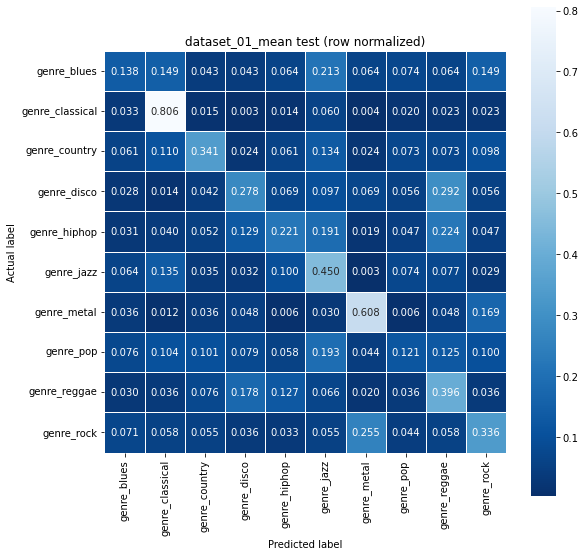



Dataset: ../../../datasets/dataset_02_mean_cov.pickle

Train: train_accuracy = 0.615457

                 precision    recall  f1-score   support

    genre_blues     0.3612    0.7620    0.4901       374
genre_classical     0.8411    0.8403    0.8407      4221
  genre_country     0.4775    0.7462    0.5823       327
    genre_disco     0.2893    0.9170    0.4398       289
   genre_hiphop     0.5756    0.5996    0.5874      1701
     genre_jazz     0.4795    0.7172    0.5747      1241
    genre_metal     0.4315    0.8662    0.5760       665
      genre_pop     0.7301    0.3159    0.4410      4274
   genre_reggae     0.5008    0.8464    0.6292       788
     genre_rock     0.6664    0.5212    0.5850      3200

       accuracy                         0.6155     17080
      macro avg     0.5353    0.7132    0.5746     17080
   weighted avg     0.6694    0.6155    0.6087     17080

Test: test_accuracy = 0.490752

                 precision    recall  f1-score   support

    genre_blues   

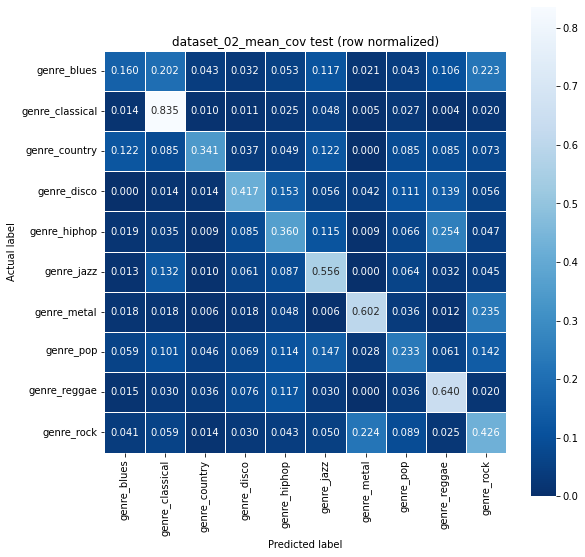



Dataset: ../../../datasets/dataset_03_mean_icov.pickle

Train: train_accuracy = 0.599649

                 precision    recall  f1-score   support

    genre_blues     0.4014    0.7567    0.5246       374
genre_classical     0.8567    0.8214    0.8387      4221
  genre_country     0.3443    0.8624    0.4921       327
    genre_disco     0.2772    0.9343    0.4276       289
   genre_hiphop     0.6195    0.5409    0.5775      1701
     genre_jazz     0.4284    0.7010    0.5318      1241
    genre_metal     0.4395    0.8466    0.5786       665
      genre_pop     0.7059    0.3308    0.4505      4274
   genre_reggae     0.4619    0.8084    0.5879       788
     genre_rock     0.6520    0.4800    0.5529      3200

       accuracy                         0.5996     17080
      macro avg     0.5187    0.7082    0.5562     17080
   weighted avg     0.6618    0.5996    0.5975     17080

Test: test_accuracy = 0.484196

                 precision    recall  f1-score   support

    genre_blues  

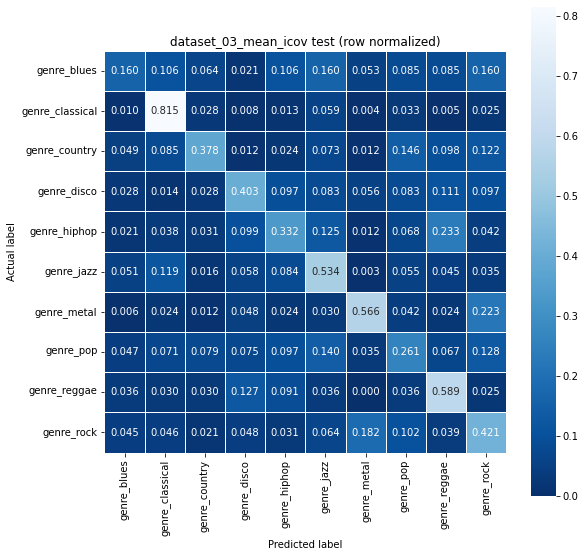



Dataset: ../../../datasets/dataset_04_mean_cov_icov.pickle

Train: train_accuracy = 0.638525

                 precision    recall  f1-score   support

    genre_blues     0.4089    0.8342    0.5488       374
genre_classical     0.8645    0.8266    0.8451      4221
  genre_country     0.4172    0.8471    0.5590       327
    genre_disco     0.3297    0.9308    0.4869       289
   genre_hiphop     0.6206    0.6461    0.6331      1701
     genre_jazz     0.5049    0.7494    0.6033      1241
    genre_metal     0.4634    0.8752    0.6059       665
      genre_pop     0.7368    0.3622    0.4856      4274
   genre_reggae     0.5275    0.8756    0.6584       788
     genre_rock     0.6778    0.5344    0.5976      3200

       accuracy                         0.6385     17080
      macro avg     0.5551    0.7482    0.6024     17080
   weighted avg     0.6884    0.6385    0.6341     17080

Test: test_accuracy = 0.509717

                 precision    recall  f1-score   support

    genre_blu

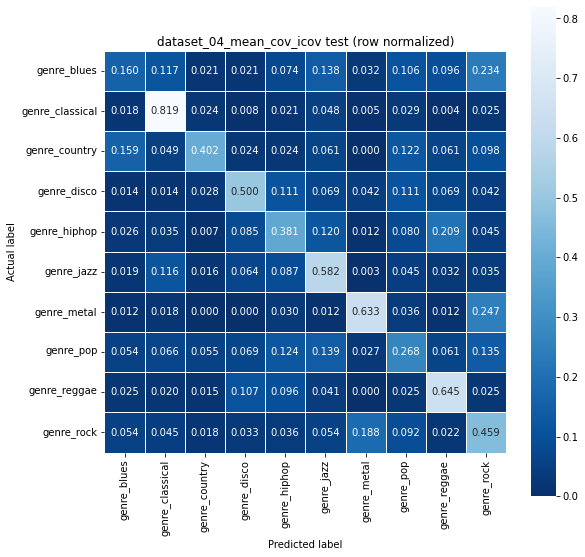



Dataset: ../../../datasets/dataset_05_pvtt.pickle

Train: train_accuracy = 0.475995

                 precision    recall  f1-score   support

    genre_blues     0.1803    0.2059    0.1923       374
genre_classical     0.8757    0.8275    0.8509      4221
  genre_country     0.1446    0.6055    0.2335       327
    genre_disco     0.2655    0.6678    0.3799       289
   genre_hiphop     0.4435    0.3139    0.3676      1701
     genre_jazz     0.3162    0.6100    0.4165      1241
    genre_metal     0.3095    0.8406    0.4524       665
      genre_pop     0.6283    0.1621    0.2578      4274
   genre_reggae     0.2568    0.7272    0.3796       788
     genre_rock     0.5754    0.3291    0.4187      3200

       accuracy                         0.4760     17080
      macro avg     0.3996    0.5290    0.3949     17080
   weighted avg     0.5837    0.4760    0.4703     17080

Test: test_accuracy = 0.424257

                 precision    recall  f1-score   support

    genre_blues     0.

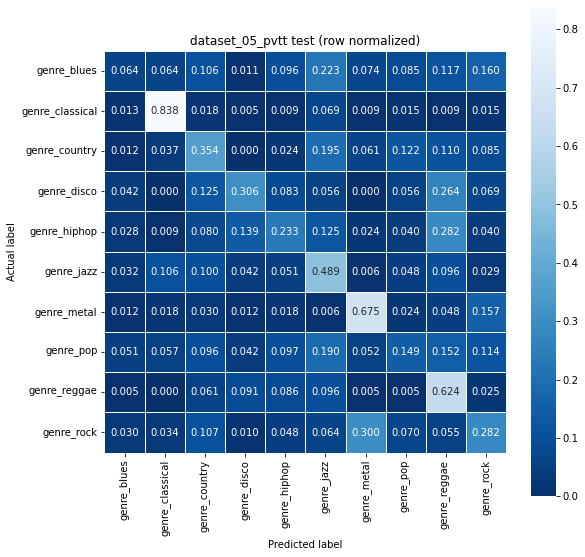



Dataset: ../../../datasets/dataset_06_pvtt_mean.pickle

Train: train_accuracy = 0.544204

                 precision    recall  f1-score   support

    genre_blues     0.2188    0.5428    0.3118       374
genre_classical     0.8842    0.8396    0.8613      4221
  genre_country     0.2888    0.6881    0.4069       327
    genre_disco     0.3563    0.8235    0.4974       289
   genre_hiphop     0.5320    0.4350    0.4787      1701
     genre_jazz     0.3646    0.6487    0.4668      1241
    genre_metal     0.3708    0.8586    0.5179       665
      genre_pop     0.6884    0.2129    0.3252      4274
   genre_reggae     0.3217    0.7944    0.4579       788
     genre_rock     0.6258    0.4478    0.5220      3200

       accuracy                         0.5442     17080
      macro avg     0.4651    0.6291    0.4846     17080
   weighted avg     0.6331    0.5442    0.5380     17080

Test: test_accuracy = 0.462421

                 precision    recall  f1-score   support

    genre_blues  

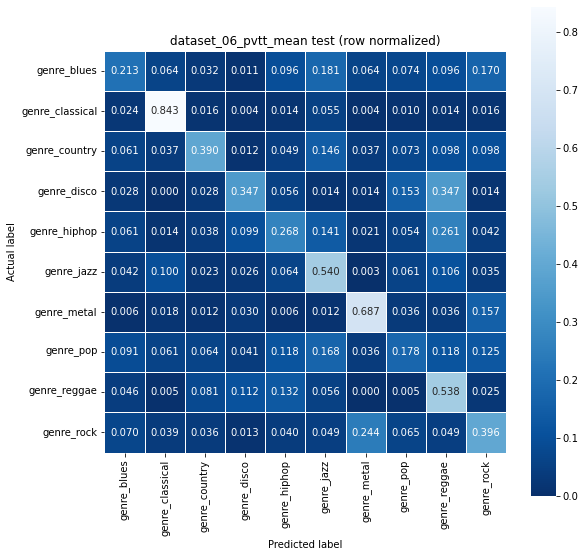



Dataset: ../../../datasets/dataset_07_pvtt_mean_cov.pickle

Train: train_accuracy = 0.622775

                 precision    recall  f1-score   support

    genre_blues     0.3380    0.7727    0.4703       374
genre_classical     0.8949    0.8448    0.8691      4221
  genre_country     0.4678    0.7554    0.5778       327
    genre_disco     0.3376    0.9170    0.4935       289
   genre_hiphop     0.5719    0.6496    0.6083      1701
     genre_jazz     0.4541    0.7502    0.5658      1241
    genre_metal     0.4219    0.9098    0.5765       665
      genre_pop     0.7648    0.2997    0.4307      4274
   genre_reggae     0.4934    0.8503    0.6244       788
     genre_rock     0.6772    0.5244    0.5911      3200

       accuracy                         0.6228     17080
      macro avg     0.5422    0.7274    0.5807     17080
   weighted avg     0.6906    0.6228    0.6159     17080

Test: test_accuracy = 0.500351

                 precision    recall  f1-score   support

    genre_blu

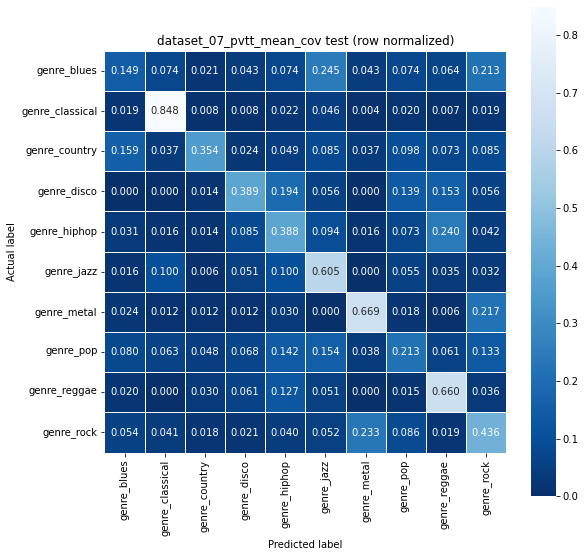



Dataset: ../../../datasets/dataset_08_pvtt_mean_icov.pickle

Train: train_accuracy = 0.608138

                 precision    recall  f1-score   support

    genre_blues     0.3816    0.7540    0.5067       374
genre_classical     0.8919    0.8427    0.8666      4221
  genre_country     0.3649    0.8257    0.5061       327
    genre_disco     0.3329    0.9412    0.4919       289
   genre_hiphop     0.5761    0.5362    0.5554      1701
     genre_jazz     0.4130    0.7284    0.5271      1241
    genre_metal     0.4270    0.9023    0.5797       665
      genre_pop     0.7575    0.2953    0.4249      4274
   genre_reggae     0.4544    0.8338    0.5882       788
     genre_rock     0.6665    0.5222    0.5856      3200

       accuracy                         0.6081     17080
      macro avg     0.5266    0.7182    0.5632     17080
   weighted avg     0.6808    0.6081    0.6026     17080

Test: test_accuracy = 0.495200

                 precision    recall  f1-score   support

    genre_bl

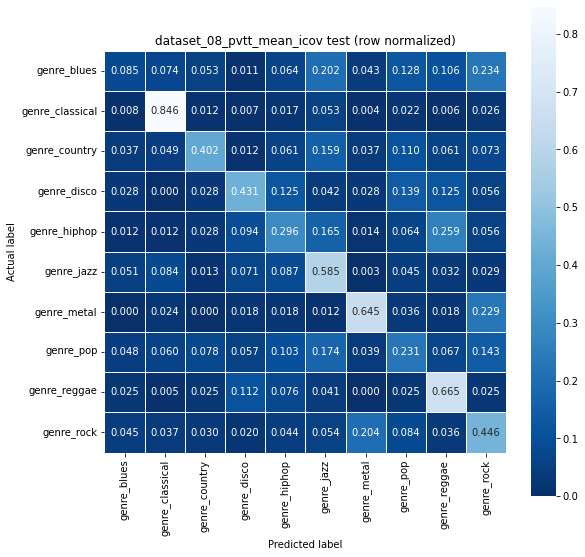



Dataset: ../../../datasets/dataset_09_pvtt_mean_cov_icov.pickle

Train: train_accuracy = 0.646546

                 precision    recall  f1-score   support

    genre_blues     0.4122    0.8342    0.5517       374
genre_classical     0.8966    0.8500    0.8727      4221
  genre_country     0.4481    0.8318    0.5824       327
    genre_disco     0.3617    0.9273    0.5204       289
   genre_hiphop     0.5957    0.6790    0.6346      1701
     genre_jazz     0.4790    0.7454    0.5832      1241
    genre_metal     0.4556    0.9188    0.6092       665
      genre_pop     0.7711    0.3421    0.4739      4274
   genre_reggae     0.5257    0.8693    0.6552       788
     genre_rock     0.6886    0.5516    0.6125      3200

       accuracy                         0.6465     17080
      macro avg     0.5634    0.7549    0.6096     17080
   weighted avg     0.7034    0.6465    0.6406     17080

Test: test_accuracy = 0.520955

                 precision    recall  f1-score   support

    genr

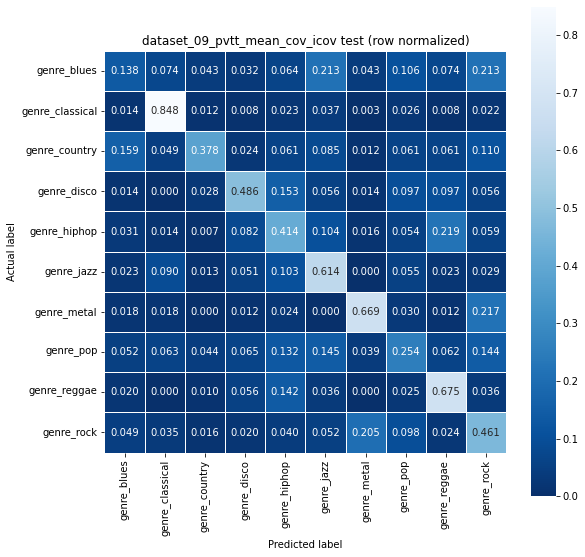

In [3]:
dataset_folder = "../../../datasets/"
datasets = sorted([name for name in glob.glob(dataset_folder + "*.pickle")])
for dataset in datasets:
 rfcross_gradient_boost_experiment(dataset)